In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

from sklearn import metrics
from sklearn import cross_validation as cv
from sklearn.cross_validation import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.grid_search import GridSearchCV
from matplotlib.colors import ListedColormap

C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [9]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")


In [10]:
P=data.iloc[:,2:32]

In [11]:
yd=pd.get_dummies(data.diagnosis)
y=yd.M
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

In [12]:
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(PP)
print (P_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())

(569, 11)
[ 0.42661046  0.15932139  0.10294428  0.07788731  0.06489774  0.05015242
  0.02145044  0.0187846   0.01505759  0.01197751  0.01117206]
0.960255820189


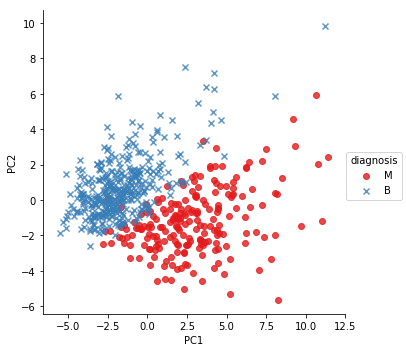

In [13]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']
d=data.iloc[:,1:2]  # diagnosis column
#merging the reduced data with diagnosis column
Xy=pd.DataFrame(np.hstack([P_pca,d.as_matrix()]),columns=n)
# plotting the the first 2 pca components against diagnosis
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False,markers=["o", "x"],palette="Set1")

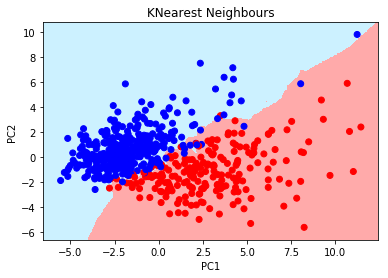

In [16]:
X=(Xy.iloc[:,0:11]).as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(xy_mesh)

Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax=plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max());plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('KNearest Neighbours')
plt.show()

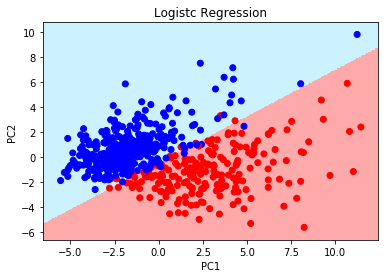

In [17]:
logreg=LogisticRegression(C=1)
logreg.fit(X_train, y_train)
logreg.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict(xy_mesh)
Z = Z.reshape(xx.shape)

%matplotlib inline
#print(Z)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Logistc Regression')
plt.show()

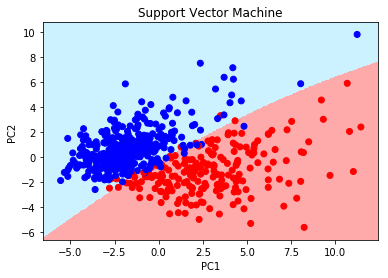

In [18]:
svc=SVC(C=100,gamma=0.001,kernel='rbf')
svc.fit(X_train, y_train)

svc.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = svc.predict(xy_mesh)
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Support Vector Machine')
plt.show()

C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


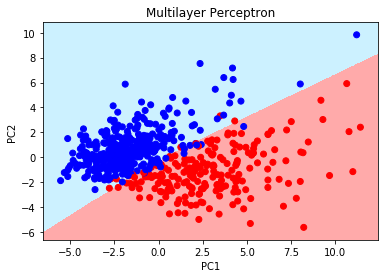

In [19]:
mlp=MLPClassifier()
mlp.fit(X_train, y_train)

mlp.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Multilayer Perceptron')
plt.show()

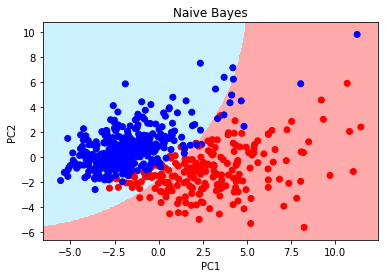

In [20]:
nb=GaussianNB()
nb.fit(X_train, y_train)

nb.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = nb.predict(xy_mesh)
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Naive Bayes')
plt.show()

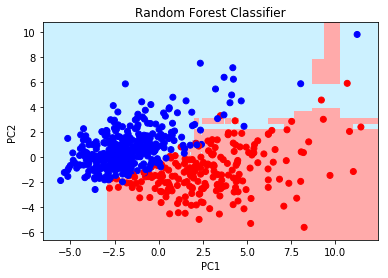

In [21]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = rfc.predict(xy_mesh)
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Random Forest Classifier')
plt.show()